In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NW_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,NaN,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,NaN,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,NaN,0.00,0.00,...,NaN,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	232
float64		column 2	116
float64		column 3	116
float64		column 4	145
float64		column 5	232
float64		column 6	145
float64		column 7	116
float64		column 8	87
float64		column 9	261
float64		column 10	290
float64		column 11	352
float64		column 12	261
float64		column 13	178
float64		column 14	203
float64		column 15	261
float64		column 16	174
float64		column 17	265
float64		column 18	203
float64		column 19	174
float64		column 20	145
float64		column 21	203
float64		column 22	381
float64		column 23	319
float64		column 24	232
float64		column 25	232
float64		column 26	381
float64		column 27	261
float64		column 28	381
float64		column 29	232
float64		column 30	174
float64		column 31	294
float64		column 32	261
float64		column 33	149
float64		column 34	290
float64		column 35	261
float64		column 36	207
float64		column 37	261
float64		column 38	174
float64		column 39	203
float64		column 40	261
float64		column 41	203
float64		column 42	207
float6

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4365.000000,4481.000000,4481.000000,4452.000000,4365.000000,4452.000000,4481.000000,4510.000000,4336.000000,4307.000000,...,4365.000000,4423.000000,4423.000000,4365.000000,4274.000000,4365.000000,4332.000000,4394.000000,4278.000000,4452.000000
mean,0.101530,0.200886,0.279288,0.059650,0.306096,0.094367,0.111946,0.103869,0.088757,0.230984,...,0.030119,0.036920,0.138893,0.016194,0.261749,0.074480,0.044619,5.128403,52.141187,281.589847
std,0.303335,1.219533,0.504878,1.315284,0.668444,0.273334,0.389254,0.399781,0.278778,0.639754,...,0.285982,0.233556,0.272145,0.108879,0.822548,0.247615,0.440983,32.093390,198.830808,608.414667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.595250,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.285000,15.000000,95.000000
75%,0.000000,0.000000,0.410000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.130000,...,0.000000,0.000000,0.186000,0.000000,0.309000,0.050000,0.000000,3.703500,44.000000,262.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

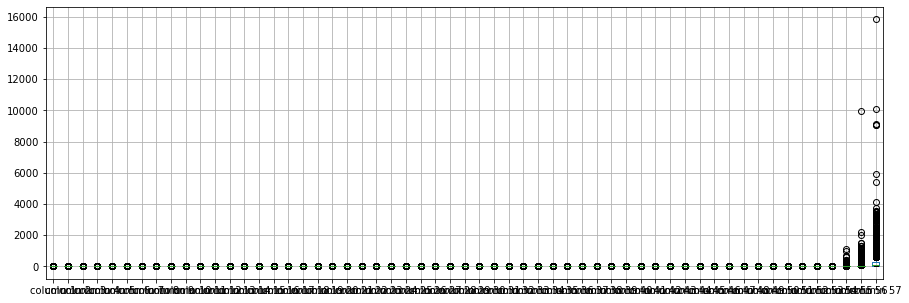

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.101530
column 2       0.200886
column 3       0.279288
column 4       0.059650
column 5       0.306096
column 6       0.094367
column 7       0.111946
column 8       0.103869
column 9       0.088757
column 10      0.230984
column 11      0.056327
column 12      0.531019
column 13      0.092048
column 14      0.057251
column 15      0.046075
column 16      0.240339
column 17      0.137128
column 18      0.180341
column 19      1.658006
column 20      0.083077
column 21      0.799426
column 22      0.113966
column 23      0.095907
column 24      0.094284
column 25      0.529624
column 26      0.251637
column 27      0.740337
column 28      0.115569
column 29      0.095853
column 30      0.098689
column 31      0.062366
column 32      0.044859
column 33      0.095917
column 34      0.045208
column 35      0.097913
column 36      0.094554
column 37      0.133881
column 38      0.012998
column 39      0.077167
column 40      0.059255
column 41      0.043475
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.012361,0.061648,-0.001329,0.019045,0.049707,0.002198,-0.003605,0.103919,0.048809,...,-0.016618,-0.023223,-0.021011,-0.028760,0.067285,0.113039,-0.009807,0.045894,0.059413,0.092608
column 2,-0.012361,1.000000,-0.025770,-0.006939,-0.021479,-0.021788,0.006199,-0.014128,-0.001247,0.040787,...,-0.014367,-0.006596,-0.046909,-0.017255,-0.013190,-0.007656,0.004013,0.002271,0.003744,-0.017335
column 3,0.061648,-0.025770,1.000000,-0.018841,0.077469,0.084864,0.033100,0.013325,0.089619,0.031418,...,-0.024797,-0.031250,-0.014811,-0.035941,0.099573,0.082044,-0.004325,0.100989,0.099015,0.064727
column 4,-0.001329,-0.006939,-0.018841,1.000000,0.005889,-0.008755,0.015604,0.003024,-0.000533,-0.002222,...,-0.001127,0.000580,-0.010541,-0.006477,-0.002150,0.008160,0.003695,0.006204,0.022299,0.024436
column 5,0.019045,-0.021479,0.077469,0.005889,1.000000,0.047762,0.145754,0.026811,0.016113,0.027021,...,-0.029767,-0.028722,-0.045834,-0.026341,0.024684,0.037041,0.003331,0.046573,0.045673,-0.001799
column 6,0.049707,-0.021788,0.084864,-0.008755,0.047762,1.000000,0.056780,0.077058,0.112597,0.012185,...,-0.028368,-0.017830,-0.005590,-0.025514,0.062835,0.096776,0.021261,-0.010925,0.078668,0.075392
column 7,0.002198,0.006199,0.033100,0.015604,0.145754,0.056780,1.000000,0.042850,0.051673,0.042815,...,-0.029005,-0.032680,-0.047709,-0.028321,0.055746,0.068709,0.049459,0.037797,0.054834,-0.008015
column 8,-0.003605,-0.014128,0.013325,0.003024,0.026811,0.077058,0.042850,1.000000,0.101994,0.076416,...,-0.023629,-0.026400,-0.031643,-0.018982,0.028369,0.053556,-0.007463,0.008006,0.033961,0.042289
column 9,0.103919,-0.001247,0.089619,-0.000533,0.016113,0.112597,0.051673,0.101994,1.000000,0.123753,...,-0.022413,-0.012301,-0.029514,0.010876,0.038387,0.152490,-0.000560,0.111786,0.172469,0.237151
column 10,0.048809,0.040787,0.031418,-0.002222,0.027021,0.012185,0.042815,0.076416,0.123753,1.000000,...,-0.014252,0.006706,0.000303,0.004332,0.032227,0.066806,0.049743,0.069175,0.095577,0.083981


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+26,17+26+26,17+26+26+26,17+26+26,17+26,17], vae_layer = False, seed = 260)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 655.3218229074512
Epoch: 1 , loss: 654.9185020101195
Epoch: 2 , loss: 653.4995458782342
Epoch: 3 , loss: 644.5755045023529
Epoch: 4 , loss: 653.8905914785139
Epoch: 5 , loss: 650.9307026082215
Epoch: 6 , loss: 651.938998976651
Epoch: 7 , loss: 646.398973312112
Epoch: 8 , loss: 652.1269089967947
Epoch: 9 , loss: 638.6452925944577
Epoch: 10 , loss: 656.9222235596554
Epoch: 11 , loss: 643.5602889642482
Epoch: 12 , loss: 633.5401522274217
Epoch: 13 , loss: 544.9100966237563
Epoch: 14 , loss: 486.93224172558934
Epoch: 15 , loss: 489.09807171971124
Epoch: 16 , loss: 466.991810443094
Epoch: 17 , loss: 461.3833571111699
Epoch: 18 , loss: 450.5433377521794
Epoch: 19 , loss: 458.38042715783735
Epoch: 20 , loss: 465.91944701829436
Epoch: 21 , loss: 441.43669684008023
Epoch: 22 , loss: 466.71412190826095
Epoch: 23 , loss: 468.2077747836761
Epoch: 24 , loss: 451.8438136668986
Epoch: 25 , loss: 462.3771247730853
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22    -0.028524
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.141317
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.153048
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.012346,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.070767,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.23569,0.000000,0.0,...,0.091524,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4593,0.0,0.000000,0.0,0.000000,0.0,0.0,0.127992,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4594,0.0,0.110641,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4595,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

7362.769373459683

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.15514071303410432

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.64,0.000000,0.32,0.00,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000,0.0,0.778,0.000,0.000000,3.756,61.0,278.0
1,0.21,0.280000,0.50,0.000000,0.14,0.28,0.210000,0.07000,0.000000,0.94,...,0.000000,0.000000,0.132,0.0,0.372,0.180,0.048000,5.114,101.0,1028.0
2,0.00,0.000000,0.00,0.000000,0.63,0.00,0.310000,0.63000,0.310000,0.63,...,0.000000,0.000000,0.135,0.0,0.135,0.000,0.000000,3.537,40.0,191.0
3,0.00,0.000000,0.00,0.012346,1.85,0.00,0.000000,1.85000,0.000000,0.00,...,0.000000,0.000000,0.223,0.0,0.000,0.000,0.000000,3.000,15.0,54.0
4,0.00,0.000000,0.00,0.000000,1.92,0.00,0.000000,0.00000,0.070767,0.64,...,0.000000,0.000000,0.054,0.0,0.164,0.054,0.000000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.64,0.000000,0.00,0.00,0.000000,0.23569,0.000000,0.00,...,0.091524,0.000000,0.348,0.0,1.160,0.000,0.000000,3.121,15.0,103.0
4593,0.00,0.000000,0.00,0.000000,0.00,0.00,0.127992,0.00000,0.000000,0.00,...,0.000000,0.000000,0.000,0.0,0.000,0.000,0.000000,3.043,15.0,70.0
4594,0.00,0.110641,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.136,0.0,0.000,0.000,0.409000,1.837,12.0,68.0
4595,0.17,0.000000,0.68,0.000000,0.34,0.34,0.000000,0.00000,0.000000,0.00,...,0.000000,0.000000,0.032,0.0,0.065,0.000,0.000000,1.189,5.0,69.0


In [21]:
imputations[-1].to_excel("Spam_NW_5(imp).xlsx", index=False, header=False)